In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [116]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250520\2.5 V\pos0 10\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))

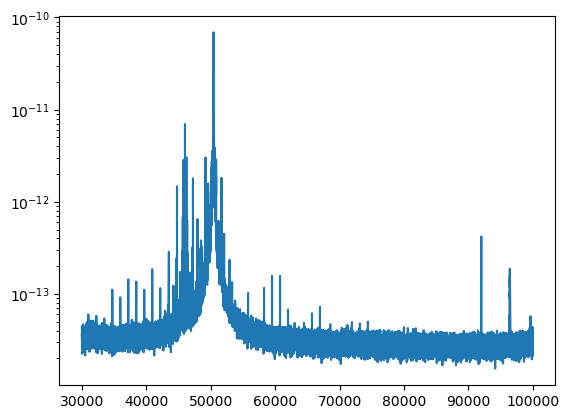

In [119]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
lb = 30000
ub = 100000
plt.plot(PSD[0][lb:ub], np.sqrt(PSD[1][lb:ub]*cal))
plt.yscale('log')

In [89]:
freqs = [4600]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0, 1, 2]
cycles = np.linspace(0, 39, 40, dtype = int)
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
cfs_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250507\20250520\2.5 V\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            cf2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        cf = np.argmax(np.abs(fft_drive2[4800:5200]))*10+48000
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
                        cf2[m, samples_per_file*n+i] = cf
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2
            cfs_pos[cycle, direction-1, position] = cf2

In [123]:
data_dict = {'amps': amps_pos, 'phases': phases_pos, 'cfs': cfs_pos}

In [125]:
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\magsweep250520.hdf5'
au.save_data_hdf5(filename, data_dict)

In [24]:
phases_pos

array([[[[[-6.13905168e+00, -6.05912887e+00, -6.17518154e+00, ...,
           -5.06125300e-01, -1.59896736e-01, -1.49714838e-02]],

         [[-7.17445443e-01, -1.06308369e+00, -1.14110600e+00, ...,
           -6.10469548e+00, -6.14461052e+00, -6.04586590e+00]],

         [[-8.85814610e-02, -6.17824869e+00, -6.17325178e+00, ...,
           -5.99860591e+00, -4.02704155e-04, -6.22451126e+00]]],


        [[[-7.15111522e-01, -6.36857132e-01, -4.41066192e-01, ...,
           -4.23018787e-01, -3.47851520e-01, -3.30324957e-01]],

         [[-6.27790469e+00, -5.41815643e-01, -1.07136789e+00, ...,
           -2.32649220e+00, -2.29872855e+00, -2.27427858e+00]],

         [[-1.36522640e+00, -1.47041270e+00, -1.21797528e+00, ...,
           -6.16036006e+00, -6.23004945e+00, -6.05005146e+00]]]],



       [[[[-1.33140483e+00, -1.29630916e+00, -9.74516501e-01, ...,
           -2.24129340e+00, -2.20851468e+00, -2.22883142e+00]],

         [[-2.27928639e+00, -2.24837712e+00, -2.26024479e+00, ...,
   

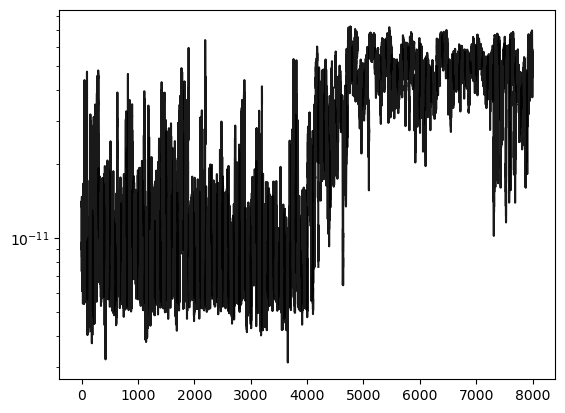

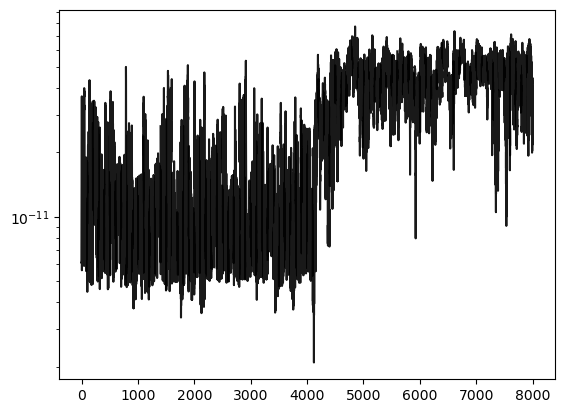

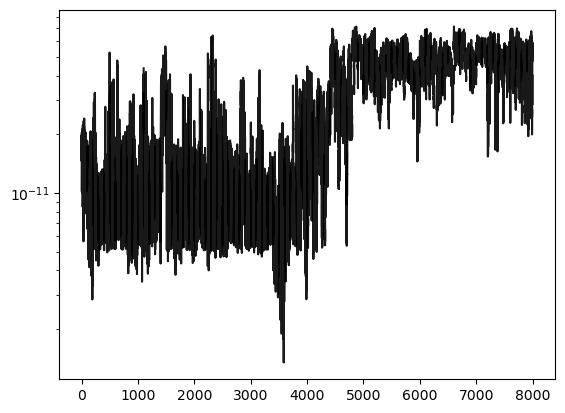

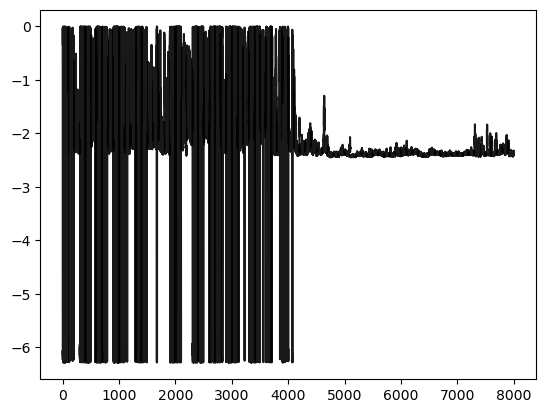

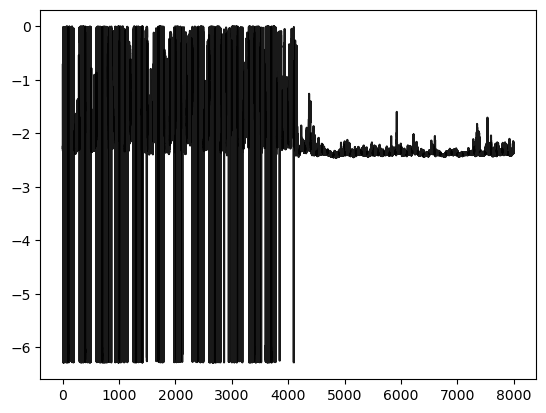

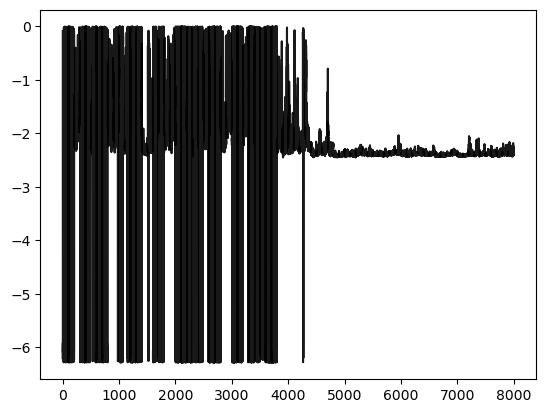

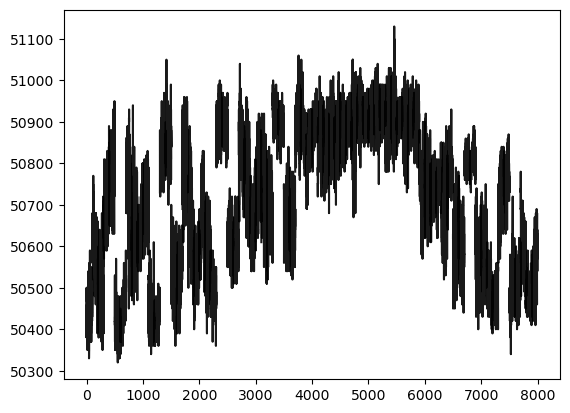

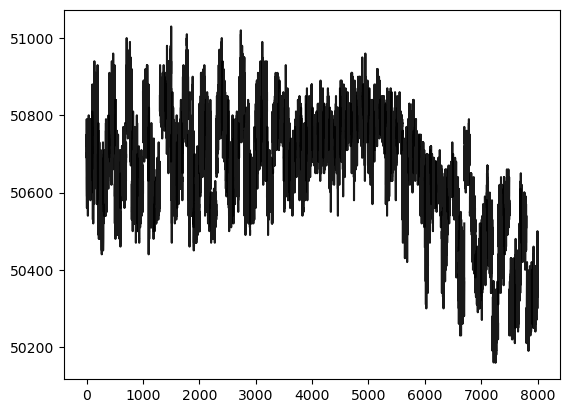

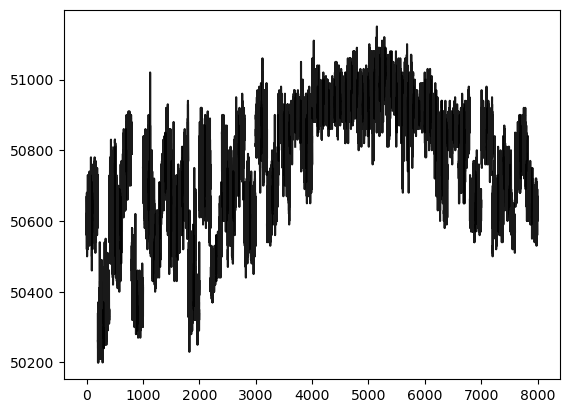

In [ ]:
for m, i in enumerate(amps_pos[:,:, 0, 0].reshape((80, 1000))[:]):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i*np.sqrt(cal), 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 1, 0].reshape((80, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*np.sqrt(cal), 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 2, 0].reshape((80, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*np.sqrt(cal), 'k', alpha = 0.9)
plt.yscale('log')

plt.figure()
for m, i in enumerate(phases_pos[:,:, 0, 0].reshape((80, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(phases_pos[:,:, 1, 0].reshape((80, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(phases_pos[:,:, 2, 0].reshape((80, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)

plt.figure()
for m, i in enumerate(cfs_pos[:,:, 0, 0].reshape((80, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 1, 0].reshape((80, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 2, 0].reshape((80, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)


In [104]:
cf_rs = cfs_pos[:,:, 0, 0].reshape((80000))
amp_rs = amps_pos[:,:, 0, 0].reshape((80000))

cf_rs2 = cfs_pos[:,:, 1, 0].reshape((80000))
amp_rs2 = amps_pos[:,:, 1, 0].reshape((80000))

cf_rs3 = cfs_pos[:,:, 2, 0].reshape((80000))
amp_rs3 = amps_pos[:,:, 2, 0].reshape((80000))

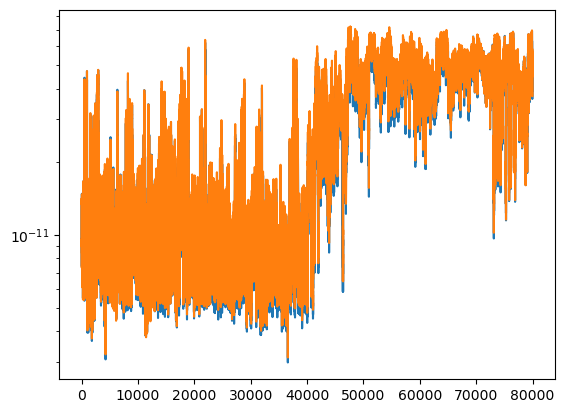

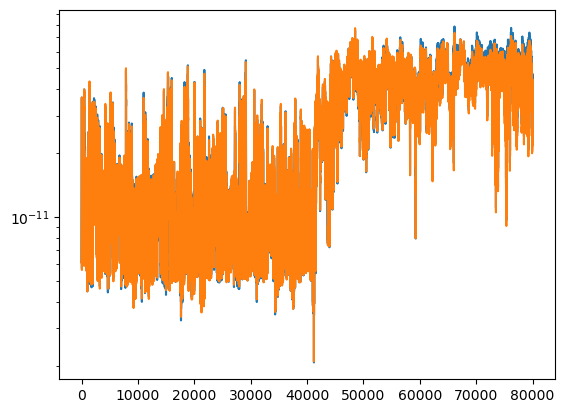

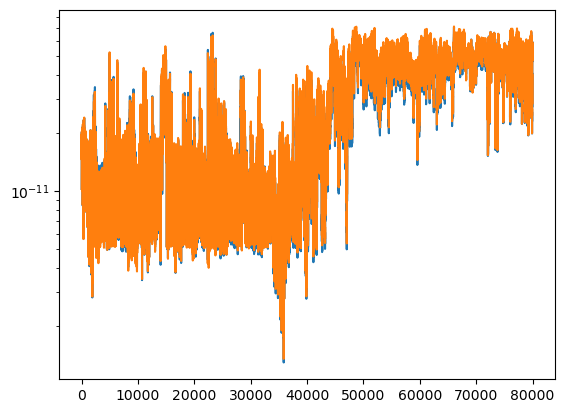

In [107]:
plt.plot(np.sqrt(cal)*amp_rs*np.abs((cf_rs**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))
plt.plot(np.sqrt(cal)*amp_rs)
plt.yscale('log')

plt.figure()
plt.plot(np.sqrt(cal)*amp_rs2*np.abs((cf_rs2**2 - 55000**2))/np.abs((cf_rs2[0]**2 - 55000**2)))
plt.plot(np.sqrt(cal)*amp_rs2)
plt.yscale('log')

plt.figure()
plt.plot(np.sqrt(cal)*amp_rs3*np.abs((cf_rs3**2 - 55000**2))/np.abs((cf_rs3[0]**2 - 55000**2)))
plt.plot(np.sqrt(cal)*amp_rs3)
plt.yscale('log')

In [108]:
amp_mean1 = np.mean(np.sqrt(cal)*amp_rs[:37000])
amp_std1 = np.std(np.sqrt(cal)*amp_rs[:37000])/np.sqrt(len(amp_rs[:37000]))
print(amp_mean1, amp_std1)

amp_mean12 = np.mean(np.sqrt(cal)*amp_rs[:37000]*np.abs((cf_rs[:37000]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))
amp_std12 = np.std(np.sqrt(cal)*amp_rs[:37000]*np.abs((cf_rs[:37000]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))/np.sqrt(len(amp_rs[:37000]))
print(amp_mean12, amp_std12)

amp_mean2 = np.mean(np.sqrt(cal)*amp_rs2[:37000])
amp_std2 = np.std(np.sqrt(cal)*amp_rs2[:37000])/np.sqrt(len(amp_rs2[:37000]))
print(amp_mean2, amp_std2)

amp_mean22 = np.mean(np.sqrt(cal)*amp_rs2[:37000]*np.abs((cf_rs2[:37000]**2 - 55000**2))/np.abs((cf_rs2[0]**2 - 55000**2)))
amp_std22 = np.std(np.sqrt(cal)*amp_rs2[:37000]*np.abs((cf_rs2[:37000]**2 - 55000**2))/np.abs((cf_rs2[0]**2 - 55000**2)))/np.sqrt(len(amp_rs2[:37000]))
print(amp_mean22, amp_std22)

amp_mean3 = np.mean(np.sqrt(cal)*amp_rs3[:37000])
amp_std3 = np.std(np.sqrt(cal)*amp_rs3[:37000])/np.sqrt(len(amp_rs3[:37000]))
print(amp_mean3, amp_std3)

amp_mean32 = np.mean(np.sqrt(cal)*amp_rs3[:37000]*np.abs((cf_rs3[:37000]**2 - 55000**2))/np.abs((cf_rs3[0]**2 - 55000**2)))
amp_std32 = np.std(np.sqrt(cal)*amp_rs3[:37000]*np.abs((cf_rs3[:37000]**2 - 55000**2))/np.abs((cf_rs3[0]**2 - 55000**2)))/np.sqrt(len(amp_rs3[:37000]))
print(amp_mean32, amp_std32)

1.1198227746228443e-11 3.398654711060548e-14
1.0736539314904277e-11 3.260908371659731e-14
1.143017703196578e-11 3.206130693634987e-14
1.142057786629113e-11 3.216871469099904e-14
1.1637093821619062e-11 3.6791145676312866e-14
1.1578926830786499e-11 3.6756243004961456e-14


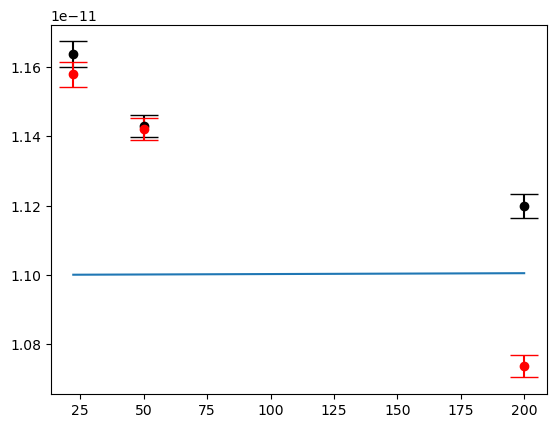

In [122]:
B = 200*np.array([1, (8/16)**2, (8/24)**2])
B2 = 200*np.linspace(1, (8/24)**2, 1000)

m1 = [amp_mean1, amp_mean2, amp_mean3]
s1 = [amp_std1, amp_std2, amp_std3]

m2 = [amp_mean12, amp_mean22, amp_mean32]
s2 = [amp_std12, amp_std22, amp_std32]

plt.errorbar(B, m1, yerr = s1, color = 'k', marker = 'o', linestyle = 'None', capsize = 10)
plt.errorbar(B, m2, yerr = s2, color = 'r', marker = 'o', linestyle = 'None', capsize = 10)
plt.plot(B2, 1.1*10**(-11)+B2*2.5*10**(-17))

In [121]:
B2[0]*2.5*10**(-17)

5e-15

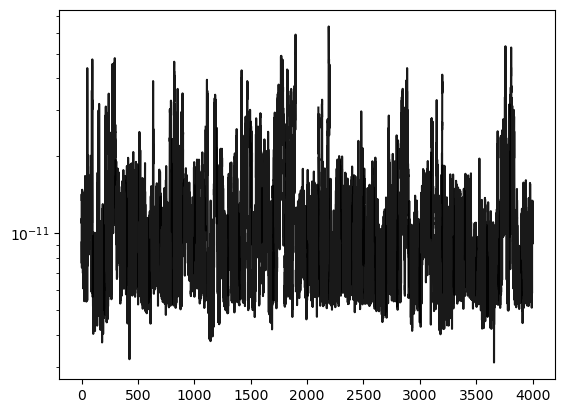

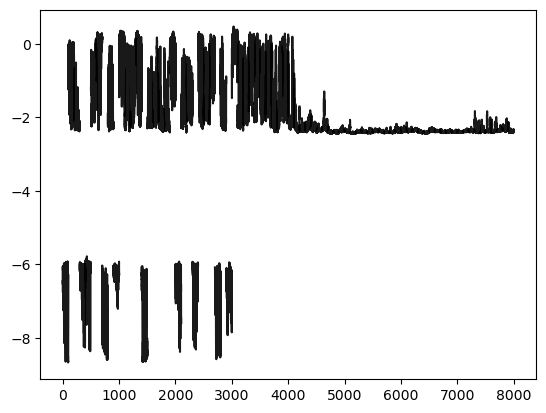

In [36]:
for m, i in enumerate(amps_pos[:,:, 0, 0].reshape((80, 1000))[:40]):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i*np.sqrt(cal), 'k', alpha = 0.9)
plt.yscale('log')

plt.figure()
for m, i in enumerate(phases_pos[:,:, 0, 0].reshape((80, 1000))[:]):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, np.unwrap(i), 'k', alpha = 0.9)

In [70]:
ampmean1 = []
for i in amps_pos[:,:, 0, 0].reshape((80, 1000))[:37]:
    ampmean1.append(np.mean(i*np.sqrt(cal)))

ampmean2 = []
for i in amps_pos[:,:, 1, 0].reshape((80, 1000))[:37]:
    ampmean2.append(np.mean(i*np.sqrt(cal)))

ampmean3 = []
for i in amps_pos[:,:, 2, 0].reshape((80, 1000))[:37]:
    ampmean3.append(np.mean(i*np.sqrt(cal)))

In [71]:
print(np.mean(ampmean1), np.std(ampmean1)/np.sqrt(37))
print(np.mean(ampmean2), np.std(ampmean2)/np.sqrt(37))
print(np.mean(ampmean3), np.std(ampmean3)/np.sqrt(37))

m1, s1 = np.mean(ampmean1), np.std(ampmean1)/np.sqrt(37)
m2, s2 = np.mean(ampmean2), np.std(ampmean2)/np.sqrt(37)    
m3, s3 = np.mean(ampmean3), np.std(ampmean3)/np.sqrt(37)

1.1198227746228445e-11 5.409755158504438e-13
1.143017703196578e-11 4.972091390867697e-13
1.163709382161906e-11 6.74852077286408e-13


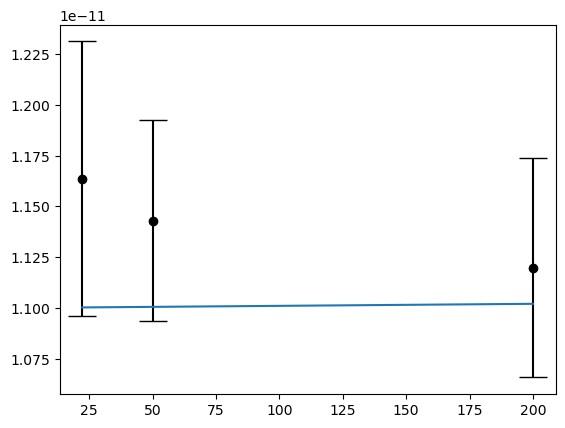

In [75]:
B = 200*np.array([1, (8/16)**2, (8/24)**2])
B2 = 200*np.linspace(1, (8/24)**2, 1000)

plt.errorbar(B, [m1, m2, m3], yerr = [s1, s2, s3], color = 'k', marker = 'o', linestyle = 'None', capsize = 10)
plt.plot(B2, 1.1*10**(-11)+B2*10**(-16))

In [64]:
phasemean1 = []
for i in phases_pos[:,:, 0, 0].reshape((80, 1000))[:37]:
    phasemean1.append(np.mean(np.unwrap(i)))

phasemean2 = []
for i in phases_pos[:,:, 1, 0].reshape((80, 1000))[:37]:
    phasemean2.append(np.mean(np.unwrap(i)))

phasemean3 = []
for i in phases_pos[:,:, 2, 0].reshape((80, 1000))[:37]:
    phasemean3.append(np.mean(np.unwrap(i)))

In [67]:
print(np.mean(np.unwrap(phasemean1)), np.std(np.unwrap(phasemean1))/np.sqrt(37))
print(np.mean(np.unwrap(phasemean2)), np.std(np.unwrap(phasemean2))/np.sqrt(37))
print(np.mean(np.unwrap(phasemean3)), np.std(np.unwrap(phasemean3))/np.sqrt(37))

m1, s1 = np.mean(np.unwrap(phasemean1)), np.std(np.unwrap(phasemean1))/np.sqrt(37)
m2, s2 = np.mean(np.unwrap(phasemean2)), np.std(np.unwrap(phasemean2))/np.sqrt(37)    
m3, s3 = np.mean(np.unwrap(phasemean3)), np.std(np.unwrap(phasemean3))/np.sqrt(37)

-7.212030194143788 0.10904587647705025
-0.9384259273267465 0.11094742776302137
-0.8701307420794285 0.10563946328611769


<ErrorbarContainer object of 3 artists>

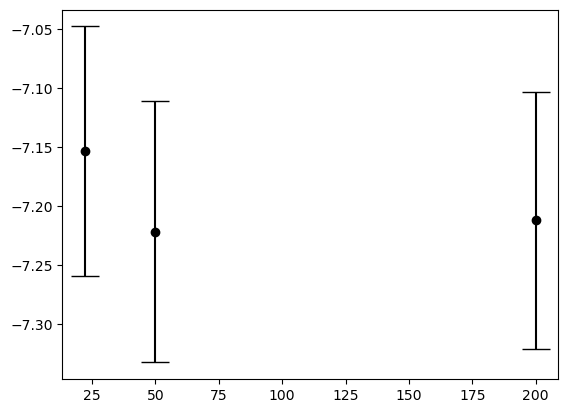

In [69]:
B = 200*np.array([1, (8/16)**2, (8/24)**2])

plt.errorbar(B, np.unwrap(np.array([m1, m2, m3])), yerr = [s1, s2, s3], color = 'k', marker = 'o', linestyle = 'None', capsize = 10)

In [48]:
ampmean1 = []
for i in amps_pos[:,:, 0, 0].reshape((80, 1000))[50:]:
    ampmean1.append(np.mean(i))

ampmean2 = []
for i in amps_pos[:,:, 1, 0].reshape((80, 1000))[50:]:
    ampmean2.append(np.mean(i))

ampmean3 = []
for i in amps_pos[:,:, 2, 0].reshape((80, 1000))[50:]:
    ampmean3.append(np.mean(i))

In [51]:
print(np.mean(ampmean1), np.std(ampmean1)/np.sqrt(30))
print(np.mean(ampmean2), np.std(ampmean2)/np.sqrt(30))
print(np.mean(ampmean3), np.std(ampmean3)/np.sqrt(30))

m1, s1 = np.mean(ampmean1), np.std(ampmean1)/np.sqrt(30)
m2, s2 = np.mean(ampmean2), np.std(ampmean2)/np.sqrt(30)    
m3, s3 = np.mean(ampmean3), np.std(ampmean3)/np.sqrt(30)

0.0017512486340009175 3.91650878463007e-05
0.0016416103555417188 3.874892976833403e-05
0.0017377383004975153 3.3315125795492006e-05


<ErrorbarContainer object of 3 artists>

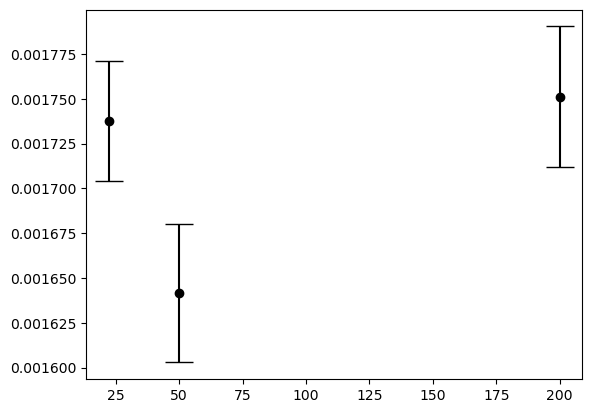

In [52]:
B = 200*np.array([1, (8/16)**2, (8/24)**2])

plt.errorbar(B, [m1, m2, m3], yerr = [s1, s2, s3], color = 'k', marker = 'o', linestyle = 'None', capsize = 10)

In [53]:
phasemean1 = []
for i in phases_pos[:,:, 0, 0].reshape((80, 1000))[50:]:
    phasemean1.append(np.mean(i))

phasemean2 = []
for i in phases_pos[:,:, 1, 0].reshape((80, 1000))[50:]:
    phasemean2.append(np.mean(i))

phasemean3 = []
for i in phases_pos[:,:, 2, 0].reshape((80, 1000))[50:]:
    phasemean3.append(np.mean(i))

In [54]:
print(np.mean(phasemean1), np.std(phasemean1)/np.sqrt(30))
print(np.mean(phasemean2), np.std(phasemean2)/np.sqrt(30))
print(np.mean(phasemean3), np.std(phasemean3)/np.sqrt(30))

m1, s1 = np.mean(phasemean1), np.std(phasemean1)/np.sqrt(30)
m2, s2 = np.mean(phasemean2), np.std(phasemean2)/np.sqrt(30)    
m3, s3 = np.mean(phasemean3), np.std(phasemean3)/np.sqrt(30)

-2.373227134843783 0.00473325942404199
-2.3554205242991113 0.005224229314054762
-2.3767505798506527 0.0035168697085995668


<ErrorbarContainer object of 3 artists>

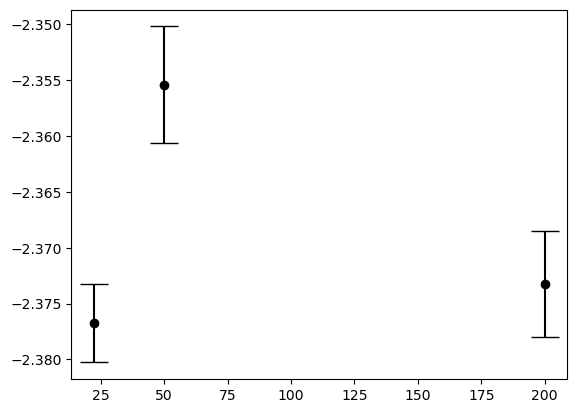

In [55]:
B = 200*np.array([1, (8/16)**2, (8/24)**2])

plt.errorbar(B, [m1, m2, m3], yerr = [s1, s2, s3], color = 'k', marker = 'o', linestyle = 'None', capsize = 10)

In [76]:
### Tests ###

In [ ]:
freqs = [4600]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0]
cycles = np.linspace(0, 1, 2, dtype = int)
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
cfs_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250507\20250520\2.5 V\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            cf2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        cf = np.argmax(np.abs(fft_drive2[4800:5200]))*10+48000
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
                        cf2[m, samples_per_file*n+i] = cf
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2
            cfs_pos[cycle, direction-1, position] = cf2

In [80]:
cfs_pos+48000

array([[[[[50470., 50500., 50500., ..., 50500., 50510., 50520.]]],


        [[[50610., 50590., 50580., ..., 50610., 50600., 50610.]]]],



       [[[[50510., 50510., 50510., ..., 50500., 50500., 50450.]]],


        [[[50590., 50620., 50630., ..., 50820., 50820., 50800.]]]]])

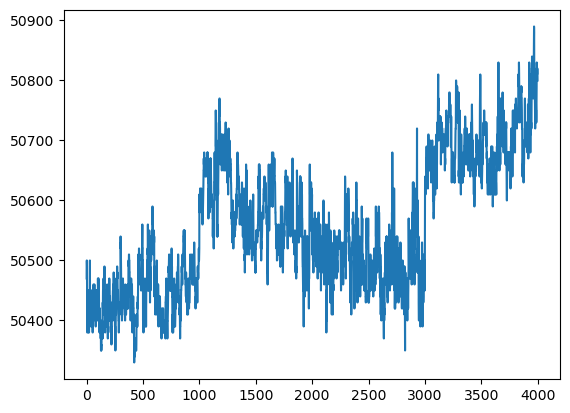

In [86]:
plt.plot(cfs_pos[:,:, 0, 0].reshape((1, 4000))[0]+48000)